In [165]:
!pip install git+https://github.com/tensorflow/docs

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-cq2pmljq
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-cq2pmljq
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.09a04bc004009599225a544fb4e02c7279edc4418_-cp36-none-any.whl size=113073 sha256=77a4fe4a750708e0cbf01650f321224db269e067096d1baf74e75cab3df234da
  Stored in directory: /tmp/pip-ephem-wheel-cache-87zkd9n3/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [166]:
df = pd.read_csv('./UCI_data.csv',parse_dates=['date'])
df = df.set_index('date')
df['hour'] = df.index.hour
df = df.resample('1H').mean()
#df.reset_index(drop=True, inplace=True)
df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,hour
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000,17.0
2016-01-11 18:00:00,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333,18.0
2016-01-11 19:00:00,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333,19.0
2016-01-11 20:00:00,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000,20.0
2016-01-11 21:00:00,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667,21.0


In [167]:
energyhr = pd.concat([df, pd.get_dummies(df['hour'],drop_first=True)], axis=1)
energyhr

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,hour,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2016-01-11 18:00:00,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2016-01-11 19:00:00,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2016-01-11 20:00:00,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2016-01-11 21:00:00,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,22.890000,53.052222,25.567222,1.000000,23.968048,43.342905,23.848333,49.253056,23.100000,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946,103.333333,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-05-27 15:00:00,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,23.007500,52.368611,26.279444,1.000000,24.045238,43.189905,23.926667,48.883333,23.138889,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025,76.666667,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2016-05-27 16:00:00,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,23.150000,52.094444,26.138889,1.000000,24.353333,44.330905,24.271444,50.785667,23.193333,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344,135.000000,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [168]:
energyhr.reset_index(drop=True, inplace=True)
energyhr=energyhr.drop(['hour'],axis=1)
#energyhr['TARGET_energy']=np.log(energyhr['TARGET_energy'])
energyhr

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
0,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,90.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,228.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,198.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,160.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,126.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,25.544444,46.638889,26.421369,41.205054,28.397778,41.160000,24.666667,45.883889,22.890000,53.052222,25.567222,1.000000,23.968048,43.342905,23.848333,49.253056,23.100000,46.594444,21.916667,755.800000,59.000000,2.000000,21.583333,13.475000,27.553946,27.553946,103.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3286,25.500000,45.677639,26.154762,41.041238,28.240000,40.306667,24.694444,45.270000,23.007500,52.368611,26.279444,1.000000,24.045238,43.189905,23.926667,48.883333,23.138889,46.590000,22.216667,755.675000,57.333333,2.000000,21.833333,13.258333,25.429025,25.429025,76.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3287,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,45.476667,23.150000,52.094444,26.138889,1.000000,24.353333,44.330905,24.271444,50.785667,23.193333,46.645381,22.883333,755.375000,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344,135.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3288,25.533333,46.783333,25.772190,42.495476,27.164444,41.247778,24.700000,45.658889,23.210000,52.296667,24.441111,1.000000,24.516190,44.515381,24.671528,50.058514,23.200000,46.780655,22.666667,755.200000,55.833333,3.416667,24.083333,13.316667,27.186003,27.186003,183.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [169]:
columns = energyhr.columns
df = energyhr
df.dtypes

T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy    float64
1.0                uint8
2.0                uint8
3.0                uint8
4.0                uint8
5.0                uint8
6.0                uint8
7.0                uint8
8.0                uint8
9.0                uint8
10.0               uint8
11.0               uint8
12.0               uint8
13.0               uint8


In [170]:
df.isnull().sum()

T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
1.0              0
2.0              0
3.0              0
4.0              0
5.0              0
6.0              0
7.0              0
8.0              0
9.0              0
10.0             0
11.0             0
12.0             0
13.0             0
14.0             0
15.0             0
16.0             0
17.0             0
18.0             0
19.0             0
20.0             0
21.0             0
22.0             0
23.0             0
dtype: int64

In [171]:
df.shape

(3290, 50)

In [172]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
sc_data = scale.fit_transform(df)
sc_data = pd.DataFrame(sc_data)
sc_data.columns=df.columns
sc_data

train_data= sc_data[1:1501]
test_data = sc_data[1502:3002]

print(f'Training data: {len(train_data)} Test data: {len(test_data)}')

Training data: 1500 Test data: 1500


In [173]:
train_result = train_data.pop('TARGET_energy')
print(train_result)
train_data.head()

1       1.522088
2       1.161832
3       0.701506
4       0.301223
5       2.242598
          ...   
1496   -0.639444
1497   -0.659458
1498   -0.739515
1499   -0.619430
1500   -0.779543
Name: TARGET_energy, Length: 1500, dtype: float64


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
1,-1.114618,1.425101,-0.490369,0.991304,-1.246261,1.732400,-0.954594,1.623065,-1.348508,0.466651,-0.285090,1.048313,-1.440104,1.302742,-2.012769,1.085134,-1.243528,0.901835,-0.277277,-2.873403,0.798412,0.566521,0.14915,0.213592,-0.448675,-0.448675,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,4.779182,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448
2,-0.742337,3.182231,-0.190429,1.391687,-1.105503,2.461081,-0.924647,2.026384,-1.334925,0.569996,-0.338128,1.078113,-1.146065,1.884198,-1.981229,1.203269,-1.282964,0.906998,-0.266302,-2.802432,0.674770,0.806527,0.14915,0.149969,1.471595,1.471595,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,4.797353,-0.208448,-0.208448,-0.208448,-0.208448
3,-0.452400,2.078154,-0.041728,1.285835,-1.024871,2.473882,-0.816156,2.352094,-1.074426,2.673533,-0.401896,1.039615,-1.249278,1.473637,-1.665545,1.391602,-1.289031,0.860533,-0.266302,-2.735968,0.528648,0.806527,0.14915,0.060498,0.115999,0.115999,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,-0.208448,4.797353,-0.208448,-0.208448,-0.208448
4,-0.234083,1.397020,0.112049,1.120151,-0.945348,2.133451,-0.701132,2.050214,-0.633419,2.095457,-0.383905,1.013754,-1.139614,1.610310,-1.471191,1.266331,-1.289031,0.785439,-0.297660,-2.697666,0.517408,0.806527,0.14915,0.012781,-1.037329,-1.037329,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,-0.208448,-0.208448,4.797353,-0.208448,-0.208448
5,-0.071815,1.116702,0.257197,0.912352,-0.897413,2.030191,-0.366269,1.955149,-0.260857,0.252512,-0.342626,0.985687,-1.181610,1.478421,-1.374298,1.165559,-1.305577,0.717821,-0.318042,-2.637961,0.528648,0.977960,0.14915,-0.005113,0.362381,0.362381,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,-0.208448,-0.208448,-0.208448,4.797353,-0.208448


In [174]:
test_result = test_data.pop('TARGET_energy')
print(test_result)
test_data.head()

1502   -0.659458
1503    1.582130
1504    0.661478
1505    4.624286
1506    1.301932
          ...   
2997   -0.139089
2998   -0.019004
2999    0.781563
3000    1.882343
3001    0.121095
Name: TARGET_energy, Length: 1500, dtype: float64


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
1502,-0.995598,-1.225904,-1.742402,-0.090044,-0.953661,-0.657465,-0.801863,-1.306762,-0.672841,-0.391863,-1.441691,0.458866,0.342756,-0.383348,0.169622,-0.388788,-0.097676,-0.320053,-1.417123,1.790366,0.730971,0.223655,1.970364,-1.255711,1.277889,1.277889,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,4.797353,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448
1503,-1.050956,-1.377549,-1.727431,-0.360073,-1.006861,-0.854394,-0.841611,-1.441543,-0.664170,-0.554827,-1.325677,0.464831,0.185435,-0.952436,0.052389,-0.965731,-0.072856,-0.467894,-1.301100,1.821909,0.551128,0.326515,2.096734,-1.206005,-0.532508,-0.532508,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,4.797353,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448
1504,-1.050956,-1.487618,-1.103254,-0.814119,-1.031799,-1.062454,-0.637699,-1.383505,-0.743293,-0.472158,-1.103281,0.302390,0.095387,-1.199360,-0.043368,-1.143764,-0.003084,-0.882052,-1.091005,1.810644,0.242024,0.977960,2.275138,-1.116535,-0.881084,-0.881084,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,4.797353,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448
1505,-1.009438,-1.715790,-0.244225,-1.774503,-0.892425,-1.114341,-0.384509,-1.586318,-0.796118,-0.564996,-0.799462,-0.027422,0.060632,-1.339294,-0.147933,-1.457157,-0.038935,-0.862876,-0.887181,1.789240,-0.083941,0.875100,2.379208,-1.068817,1.143440,1.143440,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,4.797353,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448
1506,-0.780741,-1.237813,0.257705,-1.768746,-0.222714,-0.801823,-0.263359,-1.401314,-0.811210,-0.695034,-0.587562,-0.263898,0.177273,-1.410865,-0.228345,-1.728259,-0.048036,-0.684494,-0.755479,1.775722,-0.235683,0.566521,0.706664,-1.001217,1.707666,1.707666,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,4.797353,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448,-0.209241,-0.209241,-0.208448,-0.208448,-0.208448,-0.208448,-0.208448


In [0]:
# for selu refer https://arxiv.org/pdf/1706.02515.pdf
# We have used 3 layers beacause large number of layers lead to the problem in gradient as it is difficult to backpropagate in case of more layers
# less layers can reduce error while large no. of layers make learning difficult
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='selu'),
    tf.keras.layers.Dense(5, activation='selu'),
    tf.keras.layers.Dense(1)
  ])
  # mse ir required so that backpropagation and gradient descent can calculate the changes for the neural network’s internal parameters that will minimise loss function
  # Adam Optimizer is used for first-order gradient-based optimization of stochastic objective functions.
  # Refer: https://arxiv.org/pdf/1412.6980.pdf
  model.compile(optimizer=tf.optimizers.Adam(),loss=tf.keras.losses.MeanSquaredError())
  return model

model = build_model()

In [176]:
# early stopping is used to stop training as soon as the error on the validation set is higher than it was the last time it was checked
# patience is 5 beacuse we want to compare the current loss with the last 5 values and stop if its greater than those
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
result = model.fit(train_data,train_result,epochs=200,validation_data=(test_data,test_result),batch_size=100,callbacks=[early_stop],validation_split = 0.1)

Epoch 1/200
14/14 [==============================] - 0s 7ms/step - loss: 1.8730 - val_loss: 1.5278
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 1.5538 - val_loss: 1.1480
Epoch 3/200
14/14 [==============================] - 0s 4ms/step - loss: 1.3581 - val_loss: 0.9297
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 1.2450 - val_loss: 0.8004
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 1.1724 - val_loss: 0.7045
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 1.1184 - val_loss: 0.6432
Epoch 7/200
14/14 [==============================] - 0s 4ms/step - loss: 1.0742 - val_loss: 0.5986
Epoch 8/200
14/14 [==============================] - 0s 4ms/step - loss: 1.0368 - val_loss: 0.5627
Epoch 9/200
14/14 [==============================] - 0s 4ms/step - loss: 1.0032 - val_loss: 0.5334
Epoch 10/200
14/14 [==============================] - 0s 4ms/step - loss: 0.9721 - val_loss: 0.5017
Epoch 11/

In [177]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             multiple                  250       
_________________________________________________________________
dense_37 (Dense)             multiple                  30        
_________________________________________________________________
dense_38 (Dense)             multiple                  6         
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


In [178]:
hist = pd.DataFrame(result.history)
hist['epoch'] = result.epoch
hist.tail()

,loss,val_loss,epoch
26,0.746440,0.371142,26
27,0.741692,0.371889,27
28,0.737121,0.377288,28
29,0.733353,0.378571,29
30,0.728582,0.378131,30


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MSE [TARGET_energy^2]')

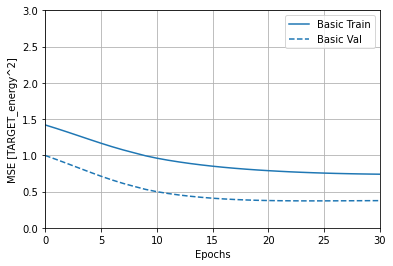

In [180]:
plotter.plot({'Basic': result}, metric = "loss")
plt.ylim([0, 3])
plt.ylabel('MSE [TARGET_energy^2]')

In [181]:
model.evaluate(test_data,test_result)

47/47 [==============================] - 0s 1ms/step - loss: 1.0348


1.0348063707351685

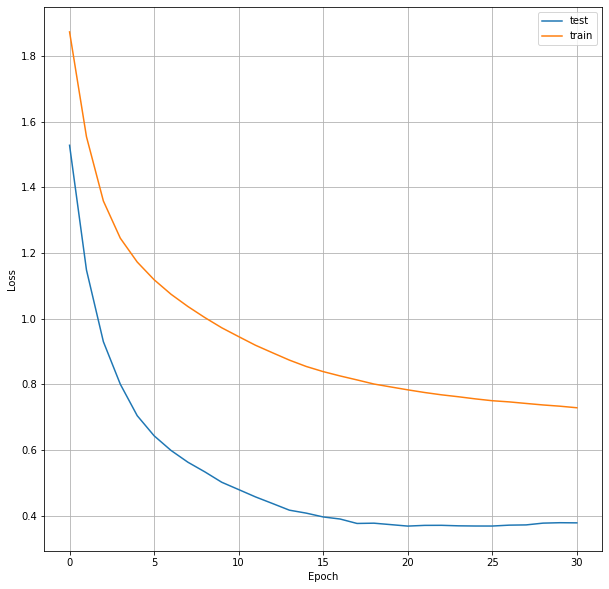

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(result.history['val_loss'])
plt.plot(result.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['test','train'], loc='upper right')
plt.show()

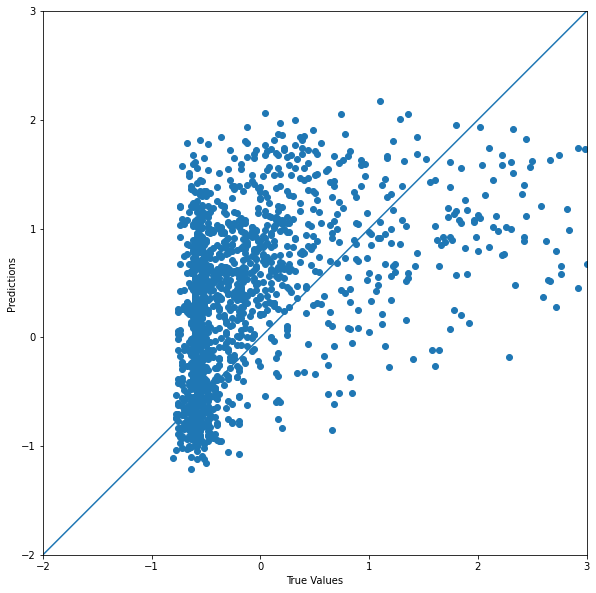

In [183]:
plt.figure(figsize=(10,10))
test_predictions = model.predict(test_data).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_result, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-2, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)